In [ ]:
#!pip install pymongo
#!pip install jupyter_contrib_nbextensions

## Setting up PyMongo

In [5]:
import pymongo
client = pymongo.MongoClient("mongodb://172.17.0.2:27017/")



In [2]:
#create test database to test Mongo connection
db = client["mydatabase"]
collection = db["mycollection"]

In [3]:
#testing the ability to insert and connect to mongo db. Prior steps will not tell us if the 
#connection actually works
data = {'name': 'John', 'age': 30}
result = collection.insert_one(data)

print(result.inserted_id)


6740afd93e9978aba645b775


In [15]:
db

Database(MongoClient(host=['172.17.0.2:27017'], document_class=dict, tz_aware=False, connect=True), 'mydatabase')

In [17]:
for coll in mydb.list_collection_names():
    print(coll)

customers
mycollection


In [22]:
client.mydatabase.command("dropDatabase")

{'ok': 1.0}

In [18]:
#showdatabase names on pymongo connection
client.list_database_names()

['admin', 'config', 'local', 'mydatabase', 'reddit']

## Import data from Kaggle

In [ ]:
!pip install opendatasets
!pip install pandas

In [3]:
import opendatasets as od
import pandas as pd

In [4]:




import opendatasets as od 
import pandas 
  
od.download( 
    "https://www.kaggle.com/datasets/gpreda/reddit-wallstreetsbets-posts")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mdcasey
Your Kaggle Key: ········
Dataset URL: https://www.kaggle.com/datasets/gpreda/reddit-wallstreetsbets-posts


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16.5M/16.5M [00:00<00:00, 71.6MB/s]


## Process Data Using Pandas

In [1]:
import pandas as pd
dataset = pd.read_csv("reddit-wallstreetsbets-posts/reddit_wsb.csv")

In [6]:
dataset.head(10)

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56
5,WE BREAKING THROUGH,405,l6uf7d,https://i.redd.it/2wef8tc062e61.png,84,1.611862e+09,NaN,2021-01-28 21:26:30
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31
8,Currently Holding AMC and NOK - Is it retarded...,200,l6ub4i,https://i.redd.it/6k2z7ouo42e61.png,161,1.611862e+09,NaN,2021-01-28 21:19:16
9,I have nothing to say but BRUH I am speechless...,291,l6uas9,https://i.redd.it/bfzzw2yo42e61.jpg,27,1.611862e+09,NaN,2021-01-28 21:18:37


### Look at data to find amount of missing data in posts

In [18]:
#https://stackoverflow.com/questions/22257527/how-do-i-get-a-summary-count-of-missing-nan-data-by-column-in-pandas
missing_values = dataset.isnull().sum()
missing_df = pd.DataFrame({
        'Column Name': missing_values.index,
        'Missing Values': missing_values.values})
missing_df

,Column Name,Missing Values
0,title,0
1,score,0
2,id,0
3,url,0
4,comms_num,0
5,created,0
6,body,28449
7,timestamp,0


### Find Date Range Contained in Data

In [20]:
dataset.dtypes

title         object
score          int64
id            object
url           object
comms_num      int64
created      float64
body          object
timestamp     object
dtype: object

In [2]:
#we need to convert the timestamp to a date object to more easily work with this data
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

In [22]:
dataset.dtypes

title                object
score                 int64
id                   object
url                  object
comms_num             int64
created             float64
body                 object
timestamp    datetime64[ns]
dtype: object

In [ ]:
alldata = dataset.groupby(dataset.timestamp).count().plot(y = 'title', kind = 'bar', title = 'All Posts')

alldata.plot(y = 'title', kind='line')
plt.title('All Posts')

plt.show()

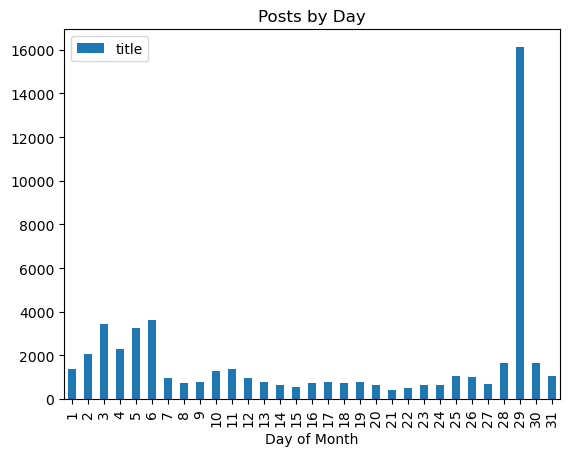

In [13]:
import matplotlib.pyplot as plt
#distribution of posts by day of month
byday = dataset.groupby(dataset.timestamp.dt.day).count()

# Plot the grouped data
byday.plot(y = 'title', kind='bar')
plt.title('Posts by Day')
plt.xlabel('Day of Month')
plt.show()

<Axes: title={'center': 'Posts per Year'}, xlabel='timestamp'>

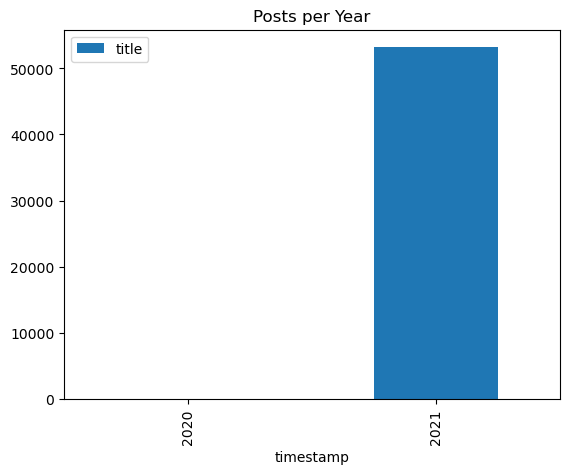

In [20]:
#looking at comments by year
dataset.groupby(dataset.timestamp.dt.year).count().plot(y = 'title', kind = 'bar', title = 'Posts per Year')

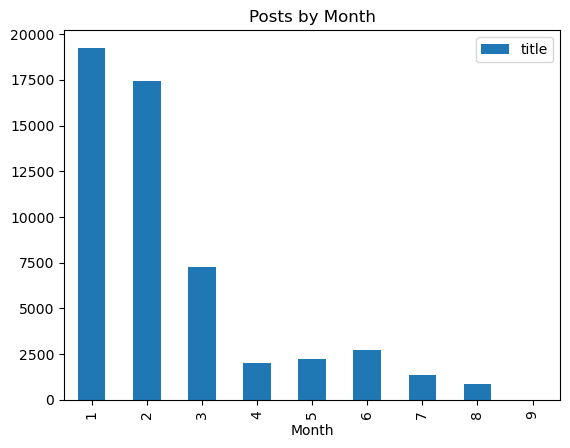

In [15]:
#looking at comments by month
bymonth = dataset.groupby(dataset.timestamp.dt.month).count()
# Plot the grouped data
bymonth.plot(y = 'title', kind='bar')
plt.title('Posts by Month')
plt.xlabel('Month')
plt.show()

<Axes: title={'center': 'Posts per Hour'}, xlabel='timestamp'>

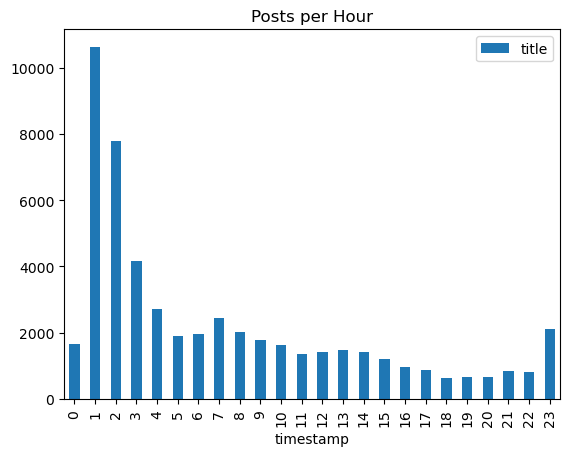

In [23]:
#looking at comments by hour
dataset.groupby(dataset.timestamp.dt.hour).count().plot(y = 'title', kind = 'bar', title = 'Posts per Hour')

## Exploring Mongo

In [ ]:
#https://stackoverflow.com/questions/54565160/how-to-convert-all-values-of-a-nested-dictionary-into-strings
import json
#convert strings to 


redposts = dataset["title"].to_dict()
preparedataforimport = json.loads(json.dumps(redposts), parse_int=str, parse_float=str)
preparedataforimport

#stringified_dict = list(stringified_dict.items())
#stringified_dict = list(stringified_dict)

#stringified_dict
#x = posts.insert_many(stringified_dict)
#print(x.inserted_ids)
##redposts = json.dumps(redposts)
# Insert the records into the MongoDB collection
#posts.insert_one(stringified_dict)


In [ ]:
#create reddit database and add a collection called posts
reditdb = client["reddit"]
posts = reditdb["posts"]
newlist = []
for key, value in preparedataforimport.items():
    newdict = {key:value}
    newlist.append(newdict)
    
mongocol = posts.insert_many(newlist)
print(mongocol.inserted_ids)

In [14]:

test = count(reditdb.posts.find({'params.value':"gme"}))


In [28]:
from bson.objectid import ObjectId
id = "673a9150a1f5bd361014b5aa"
objInstance = ObjectId(id)
 
posts.find_one({"_id": objInstance})

{'_id': ObjectId('673a9150a1f5bd361014b5aa'),
 '0': "It's not about the money, it's about sending a message. 🚀💎🙌"}

In [19]:
for coll in reditdb.list_collection_names():
    print(coll)

posts


## Searching Text using Pandas

In [16]:
#Searching text in dataframe
gmecount = dataset[dataset['title'].str.contains('gme')].count()

print(gmecount)

title        295
score        295
id           295
url          295
comms_num    295
created      295
body         125
timestamp    295
dtype: int64


## Pull stock prices from Yahoo Finance

In [ ]:
pip install yfinance

<Axes: title={'center': 'GME 2021 Stock Price'}, xlabel='Date'>

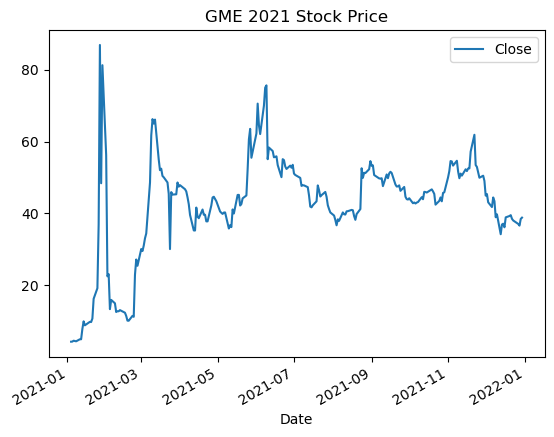

In [5]:
import yfinance as yf
import numpy as np


# Define the ticker symbol for the stock you want to pull data for
tickerSymbol = 'GME'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2021-01-01', end='2021-12-31')
tickerDf.plot(y = 'Close',kind = 'line', title = 'GME 2021 Stock Price')
